# Aprendizado por Reforço sobre Algoritmos em Jogos RTS

### Autor: Marcelo Luiz Harry Diniz Lemos

**Link para a apresentação no YouTube:** https://youtu.be/xJJ0_S6W1RU

Neste projeto, utilizamos técnicas de aprendizado por reforço para desenvolver um agente capaz de aprender a jogar jogos de estratégia em tempo real (RTS) de maneira eficiente. Este gênero é bastante desafiador para a área devido a seus grandes espaços de estados e ações, que dificultam o uso de algoritmos simples como o Q-Learning, visto em aula. Não obstante, podemos utilizar algumas estratégias para facilitar o aprendizado de nosso agente, permitindo que ele alcance bons resultados contra fortes oponentes.

Este projeto foi desenvolvido em Java com o auxilio do framework microRTS (https://github.com/santiontanon/microrts), um RTS simplificado, voltado para pesquisa, mas que mantem a complexidade tradicional em jogos do gênero. Devido a isto este notebook não executará os experimentos realizados, ele está aqui apenas como auxilio para a documentação do projeto e visualização dos resultados. Caso deseje executar os experimentos, estou deixando instruções sobre como fazê-lo ao final deste notebook.

![microrts](images/microrts.png)

## MetaBot

O agente desenvolvido para este problema foi nomeado MetaBot, e nesta seção iremos descrever os algoritmos e estratégias utilizados para sua construção.

O aprendizado do MetaBot é realizado a partir do algoritmo State-action-reward-state-action (SARSA), cujo funcionamento é bastante similar ao do Q-Learning. No entanto, ele é um algoritmo on-policy, que leva em consideração a estratégia de exploração que está sendo seguida pelo agente ao buscar a política ótima. No nosso caso, optamos por utilizar a estratégia epsilon-greedy com decaimento. Isto significa que a cada ponto de decisão o agente escolhe uma ação aleatória para ser realizada com probabilidade epsilon, e escolhe a melhor ação conhecida com probabilidade 1-epsilon. Além disto, o valor de epsilon é reduzido ao final de cada epsódio de treino, chegando próximo à zero ao final do treino. Isto é importante para que o SARSA, ao final do treino, tenha aprendido a política ótima quando a estratégia de exploração é gulosa, escolhendo sempre a melhor ação possível.

O primeiro desafio a ser tratado neste problema é o tamanho do conjunto de estados de um jogo RTS. É inviável executar uma versão tabular do algoritmo. Existem estados demais que precisam ser visitados, fazendo com que o treino do agente seja extremamente longo, e muitas vezes impossibilitando a convergência do algoritmo. Para tentar mitigar este problema, utilizamos Linear Function Approximation, um método que permite ao agente generalizar aprendizados adquiridos em um estado à outros estados semelhantes. Para isto, extraímos algumas features dos estados que são observados. Primeiro dividimos nosso mapa em quadrantes e, para cada quadrante, computamos quantas unidades aliadas ou inimigas estão naquele quadrante, quantos recursos existem ali, quantas estruturas aliadas e inimigas estão posicionadas lá, etc. Deste modo nosso agente é capaz de perceber as semelhanças entre os estados e como pode agir de forma parecida neles.

O segundo desafio é o tamanho do conjunto de ações. A cada momento do jogo podem existir diversas unidades disponíveis para o controle do agente, portanto é necessário que ele defina não apenas uma ação, mas um conjunto de ações, uma para cada unidade, juntamente com seus parâmetros (como direção de movimento ou distância de ataque). Para simplificar este processo, podemos realizar o aprendizado não sobre ações, mas sobre algoritmos. Dentro do microRts existem alguns scripts básicos como o WorkerRush, que fica constantemente criando unidades worker (trabalhador básico) e os enviado para atacar o oponente, mas que não possuem uma estratégia muito eficaz, no geral. O nosso agente realizará seu aprendizado sobre estes scripts, delegando a eles a tarefa de escolher ações para cada unidade, mas aprendendo a combiná-los de forma a alcançar uma estratégia eficaz.

Mesmo com a utilização destes métodos, o MetaBot estava apresentando uma convergência muita lenta em direção à política ótima, como veremos nos resultados. Por isto, decidi aplicar mais uma estratégia, chamada Sticky Actions. Nela, nosso agente é obrigado é manter o script selecionado ativo durante um período predeterminado de tempo. Isto aumenta o impacto de cada seleção e permite que nosso agente perceba melhor quais scripts são bons em determinadas situações, ao mesmo que também reduz a frequência de decisão do nosso agente, facilitando seu aprendizado.

## Experimentos

A melhor forma de verificar o funcionamento de nosso agente e analisar seu desempenho é colococando-o para jogar contra oponentes fortes. Selecionamos três tipos de adversários que serão descritos a seguir. O MetaBot foi colocado para aprender a jogar contra cada um deles e em seguida foi testado contra estes mesmo oponentes. Este processo foi realizado 5 vezes em cada experimento para garantir que os resultados seriam consistentes.

O primeiro tipo de adversário são bots do estado da arte que se utilizam de algoritmos de busca. Os bots selecionados foram campeões ou vice-campeões em torneios oficiais de microRTS. Apesar de adversários interessantes, estes bots levam muito tempo para tomarem suas decisões, fazendo com que a duração dos jogos seja muito alta e, por consequência, a duração do treino do MetaBot. Um único experimento contra eles leva de 5 a 6 dias para se concluir, o que inviabilizou o tunning de hiperparâmetros. Apesar disto, decidi manter os poucos resultados que obtive contra estes bots, já que são interessantes.

O segundo adversário interessante que encontrei se chama Light Rush, e está presente no próprio microRTS. Ele é ainda mais forte que os anteriores, mas executa de forma muito mais rápida, sendo ideal para a realização deste projeto. Contra ele, efetuamos 3000 jogos de treino e 100 jogos de teste com diferentes durações de sticky actions. Isto foi feito diversas vezes até encontramos os melhores hiperparâmetros (taxa de exploração, taxa de aprendizado, decaimento, features a serem extraídas, etc), mas mostramos aqui apenas os melhores resultados para que este notebook não fique longo demais.

O último adversário foi desenvolvido por mim, utilizando como base o Light Rush e conceitos de Curriculum Learning. Denominado Epsilon Light Rush, este oponente se comporta de forma semelhante ao Light Rush, mas comete erros com uma probabilidade epsilon. O valor deste epsilon também decai ao longo do treino. Ele foi desenvolvido porque em um momento inicial o MetaBot estava tendo dificuldades para conseguir ganhar alguma partida contra o Light Rush. Sendo assim, decidi criar um oponente que fosse inicialmente mais fácil, permitindo ao MetaBot encontrar as boas ações e aprendesse a base, mas que fosse se aperfeiçoando ao longo do treino, fazendo com que o MetaBot aprendesse as melhores táticas disponíveis.

*Observação: mesmo os experimentos mais rápidos deste trabalho levam algumas horas para serem concluídos. Por causa disto, deixei alguns agentes treinados juntamente com seus resultados na pasta 'experiment-results', facilitando a visualização deste trabalho. Instruções sobre como executar estes experimentos encontram-se ao final deste notebook.*

## Resultados

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.2)

### MetaBot vs Algoritmos de Busca

O MetaBot apresentou um desempenho bem interessante contra estes bots do estado da arte, principalmente quando consideramos que tanto o número de episódios de treino quanto o tunning foi bastante limitado devido ao tempo de execução. Ele conseguiu alcançar uma taxa de vitórias próxima de 80% contra dois destes adversários, mas deixou um pouco a desejar contra os outros dois, ficando com uma taxa de vitórias de aproximadamente 40%. Acredito que com um treino prolongado ele seja capaz de alcançar taxas acima de 80% contra todos, mas isto poderia levar várias semanas. Abaixo podemos ver o desempenho contra cada um destes adversários.

![algoritmos de busca](images/win_rate_1.png)

### MetaBot vs Light Rush

Já contra o Light Rush, conseguimos realizar mais experimentos, o que nos permitiu chegar a um melhor refinamento do MetaBot. A partir desta etapa também começamos a utilizar sticky actions, como podemos ver nos gráficos a seguir. Aqui, o desempenho de nosso agente passa ficar muito bom, sempre sendo capaz de convergir para a política ótima em menos de 5000 jogos de treino. No entanto podemos perceber como o uso de sticky actions acelera o processo de treino. Abaixo temos um gráfico com as taxas de vitórias durante os treinos e testes para diferentes durações de sticky actions, seguidos de um gráfico com a curva de aprendizado dos mesmos.

In [2]:
sticky_values = [1,500,1000]

data = []

for v in sticky_values:
    total = 0
    for i in range(5):
        df = pd.read_csv(f'experiment-results/LightRush/sticky_{v}/rep_{i}/train-results.txt')
        df['#result'].mask(df['#result'] == -1, 0, inplace=True)
        total += df['#result'].sum()
    data.append([v,total/15000])
    
df_train = pd.DataFrame(data=data, columns=['Sticky Actions Duration', 'Win rate'])

data = []

for v in sticky_values:
    total = 0
    for i in range(5):
        df = pd.read_csv(f'experiment-results/LightRush/sticky_{v}/rep_{i}/test-results.txt')
        df['#result'].mask(df['#result'] == -1, 0, inplace=True)
        total += df['#result'].sum()
    data.append([v,total/500])
    
df_test = pd.DataFrame(data=data, columns=['Sticky Actions Duration', 'Win rate'])

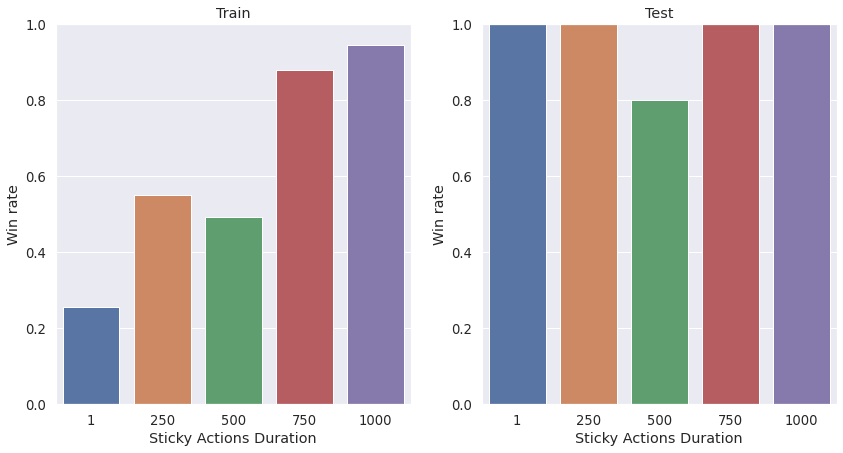

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14, 7))
sns.barplot(data=df_train, x='Sticky Actions Duration', y='Win rate', ax=ax1)
sns.barplot(data=df_test, x='Sticky Actions Duration', y='Win rate', ax=ax2)
ax1.set(ylim=(0, 1))
ax1.set_title('Train')
ax2.set(ylim=(0, 1))
ax2.set_title('Test')
plt.show()

In [4]:
sticky_values = [1,250,500,750,1000]

full=[]
for v in sticky_values:
    data = []
    for i in range(5):
        aux = pd.read_csv(f'experiment-results/LightRush/sticky_{v}/rep_{i}/train-results.txt')
        aux['Games'] = aux.index
        aux['Sticky Actions Duration'] = np.full((aux.shape[0]), v)
        aux = aux[['#result', 'Games','initial_time', 'Sticky Actions Duration']]
        aux['#result'].mask(aux['#result'] == -1, 0.5, inplace=True)
        data.append(aux)
    df = pd.concat(data)
    df.rename(columns={'#result': 'Result', 'initial_time': 'Count'}, inplace=True)
    df = df.groupby(by=['Games']).mean().reset_index()
    df['Rolling win rate'] = df['Result'].rolling(100).mean()
    full.append(df)
full_df=pd.concat(full)

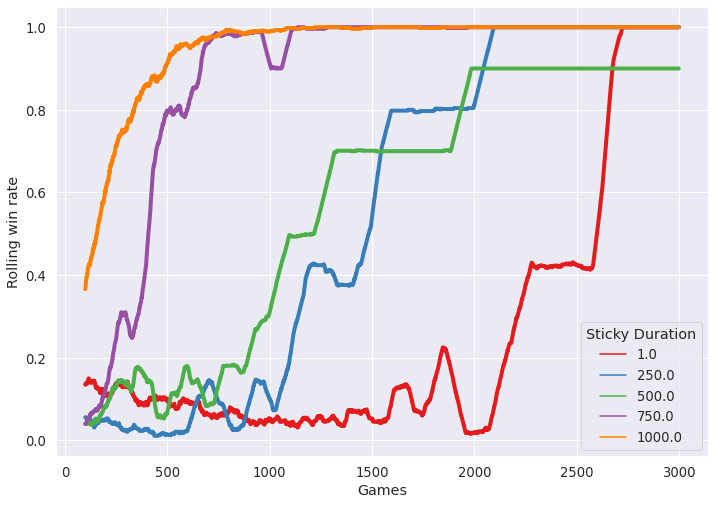

In [5]:
sns.lineplot(data=full_df, x='Games', y='Rolling win rate', hue='Sticky Actions Duration', linewidth=4, palette=sns.color_palette("Set1", 5))
plt.legend(loc=4, title='Sticky Duration')
plt.show()

### MetaBot vs Epsilon Light Rush

Os resultados contra o Epsilon Light Rush foram bem diferentes do esperado. Apesar do bom desempenho, o uso de um oponente mais fácil durante as etapas iniciais do treino não resultaram em um melhor treinamento. Pelo contrário, parece que o aprendizado inicial acaba atrapalhando e atrasando o nosso agente, como podemos ver na curva abaixo. Mesmo assim ele consegue se recuperar e aprende a política correta.

In [6]:
sticky_values = [1,500,1000]

data = []

for v in sticky_values:
    total = 0
    for i in range(5):
        df = pd.read_csv(f'experiment-results/EpsilonLightRush/sticky_{v}/rep_{i}/train-results.txt')
        df['#result'].mask(df['#result'] == -1, 0, inplace=True)
        total += df['#result'].sum()
    data.append([v,total/15000])
    
df_train = pd.DataFrame(data=data, columns=['Sticky Actions Duration', 'Win rate'])

data = []

for v in sticky_values:
    total = 0
    for i in range(5):
        df = pd.read_csv(f'experiment-results/EpsilonLightRush/sticky_{v}/rep_{i}/test-results.txt')
        df['#result'].mask(df['#result'] == -1, 0, inplace=True)
        total += df['#result'].sum()
    data.append([v,total/500])
    
df_test = pd.DataFrame(data=data, columns=['Sticky Actions Duration', 'Win rate'])

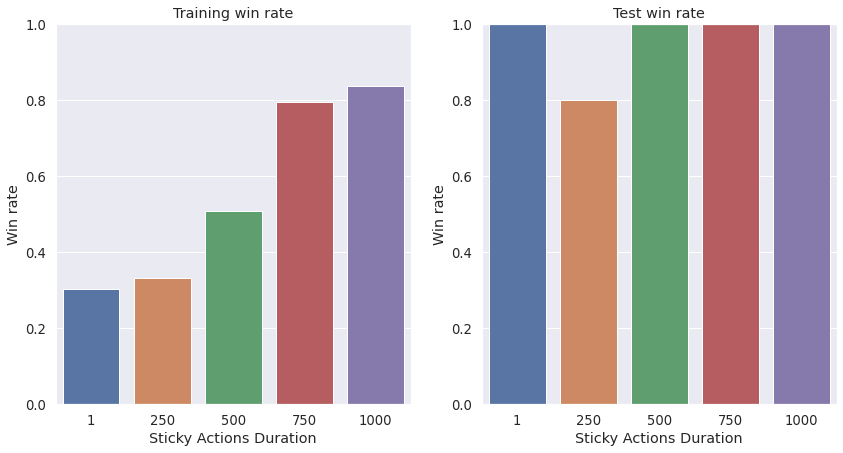

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14, 7))
sns.barplot(data=df_train, x='Sticky Actions Duration', y='Win rate', ax=ax1)
sns.barplot(data=df_test, x='Sticky Actions Duration', y='Win rate', ax=ax2)
ax1.set(ylim=(0, 1))
ax1.set_title('Training win rate')
ax2.set(ylim=(0, 1))
ax2.set_title('Test win rate')
plt.show()

In [8]:
sticky_values = [1,250,500,750,1000]

full=[]
for v in sticky_values:
    data = []
    for i in range(5):
        aux = pd.read_csv(f'experiment-results/EpsilonLightRush/sticky_{v}/rep_{i}/train-results.txt')
        aux['Games'] = aux.index
        aux['Sticky Actions Duration'] = np.full((aux.shape[0]), v)
        aux = aux[['#result', 'Games','initial_time', 'Sticky Actions Duration']]
        aux['#result'].mask(aux['#result'] == -1, 0.5, inplace=True)
        data.append(aux)
    df = pd.concat(data)
    df.rename(columns={'#result': 'Result', 'initial_time': 'Count'}, inplace=True)
    df = df.groupby(by=['Games']).mean().reset_index()
    df['Rolling win rate'] = df['Result'].rolling(100).mean()
    full.append(df)
full_df=pd.concat(full)

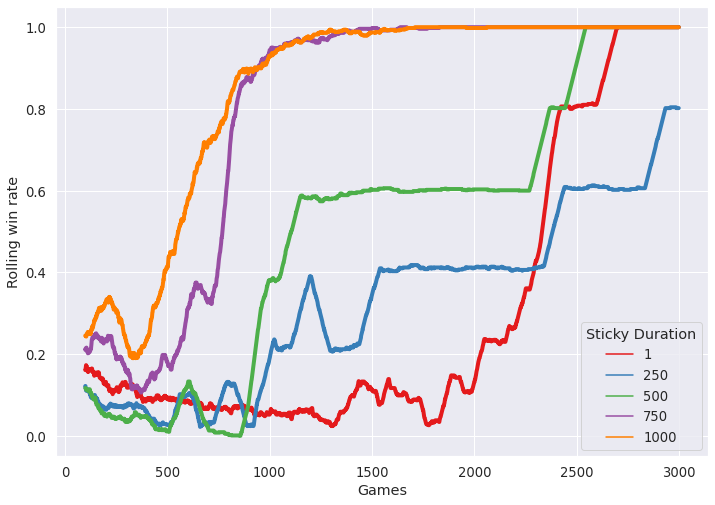

In [9]:
sns.lineplot(data=full_df, x='Games', y='Rolling win rate', hue='Sticky Actions Duration', linewidth=4, palette=sns.color_palette("Set1", 5))
plt.legend(loc=4, title='Sticky Duration')
plt.show()

## Conclusões

Conseguimos desenvolver um agente capaz de superar alguns dos adversários mais desafiadores de microRTS neste projeto. Para isto, aplicamos diversos conceitos aprendidos em aula e fomos além, aplicando métodos mais avançados e tentando desenvolver nossas próprias estratégias com base na literatura existente. O uso de sticky actions, juntamente com linear function approximation e aprendizado sobre algoritmos, se mostrou bastante eficaz para a resolução deste problema. No entando, o oponente Epsilon Light Rush que foi desenvolvido não teve o impacto esperado.

## Executando os Experimentos

**ATENÇÃO: Este projeto foi desenvolvido em um ambiente linux e talvez não funcione corretamente em outros ambientes. Recomendo que este notebook seja lido na íntegra antes que qualquer experimento seja executado, já que agentes pré-treinados serão perdidos no processo.**

### Pré Requisitos

Este projeto precisa que você tenha 'Java' e 'ant' instalados em seu computador.

Para instalar Java no Ubuntu você pode executar os seguintes comandos em um terminal:

```sudo apt update```

```sudo apt install default-jdk```

Para instalar ant no Ubuntu você pode executar os seguintes comandos em um terminal:

```sudo apt update```

```sudo apt install ant```

### Experimentos

Em um terminal, abra a pasta deste projeto. Antes de executarmos um novo experimento é necessário apagar os resultados anteriores. Pode-se usar o comando a seguir para isto (certifique-se que está no diretório correto antes de rodá-lo).

```rm -rf experiment-results```

Para compilar o código fonte do projeto apenas digite ant e pressione enter no terminal, como abaixo:

```ant```

Agora podemos rodar nossos experimentos com o seguinte commando:

```python3 scripts/sticky.py -a LightRush EpsilonLightRush -i 5 -s 1000 750 500 250 1```

Caso o script acima não funcione verifique se sua versão de python é 3.7 ou maior.

Estes experimentos podem levar várias horas para serem concluídos, mas resultados parciais podem ser vistos a qualquer momento dentro da pasta 'experiment-results'.

Em caso de dúvidas entre em contato comigo: marcelolemos@dcc.ufmg.br